#### MNIST Dataset Classification using neural networks with TensorFlow

In [ ]:
# importing the required libraries


import tensorflow as tf
import matplotlib.pyplot as mlt
import os
from keras.models import model_from_yaml
dataset = tf.keras.datasets.mnist

In [ ]:
# Loading the data and scaling it.

(x_train,y_train), (x_test,y_test) = dataset.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
# creating the list of the output classes

classes = ['zero','one','two','three','four','five','six','seven','eight','nine']

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape
y_train[1:5]

array([0, 4, 1, 9], dtype=uint8)

In [ ]:
y_train.reshape(-1,)
y_train.shape

(60000,)

In [ ]:
# Plotting the data

def plot_samples(x,y,index):
  mlt.figure(figsize = (14,3))
  mlt.imshow(x[index])
  mlt.xlabel(classes[y[index]])


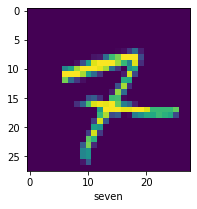

In [ ]:
plot_samples(x_train,y_train,44552)

In [ ]:
# a simple sequential neural network using TensorFlow


model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28,28)),
                             tf.keras.layers.Dense(128, activation='sigmoid'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(10)
])

In [ ]:

predictions = model(x_train[:1]).numpy()

In [ ]:

predictions

array([[-0.7679304 , -0.36384612,  0.15198347,  0.23864435, -0.5512376 ,
        -0.79500073, -0.07187814, -0.3851713 , -0.40972155, -0.36518353]],
      dtype=float32)

In [ ]:
# Final softmax layer to find the predictions

tf.nn.softmax(predictions).numpy()

array([[0.06113475, 0.09157559, 0.15339164, 0.1672777 , 0.07592707,
        0.05950202, 0.12262522, 0.08964341, 0.08746944, 0.09145319]],
      dtype=float32)

In [ ]:
# Assiging the loss metrics as SparseCategoricalCrossentropy since the output are different classes

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

2.821745

In [ ]:
# compiling the model


model.compile(optimizer='adam',
              loss= loss_fn,
              metrics= ['accuracy'])

In [ ]:
# training the model for 5 epochs 

model.fit(x_train, y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4474 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2303 - accuracy: 0.9327
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1756 - accuracy: 0.9477
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1417 - accuracy: 0.9583
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1185 - accuracy: 0.9650


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test,verbose = 2)

313/313 - 0s - loss: 0.1012 - accuracy: 0.9692


In [ ]:
"{}:{}%".format(model.metrics_names[1],(test_accuracy*100)//1)

'accuracy:96.0%'

In [ ]:
pip install PyYAML

In [ ]:
model_yaml = model.to_yaml()
with open("model.yaml","w") as yaml_file:
  yaml_file.write(model_yaml)
model.save_weights("model.h5")

In [ ]:
yaml_file = open('model.yaml','r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)
loaded_model.load_weights("model.h5")


In [ ]:
loaded_model.compile(loss = loss_fn,optimizer='rmsprop', metrics= ['accuracy'])

In [ ]:
score = loaded_model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 1ms/step - loss: 0.1144 - accuracy: 0.9640


In [ ]:
print("%s : %2.f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy : 97%
